LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='liblinear', max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)
- penalty: 惩罚项，默认为L2 范数。
- dual: 对偶化，默认为 False。
- tol: 数据解算精度。
- fit_intercept: 默认为 True，计算截距项。
- random_state: 随机数发生器。
- max_iter: 最大迭代次数，默认为 100。

In [1]:
import pandas as pd

# 加载数据集
url = 'https://cdn.aibydoing.com/hands-on-ai/files/course-8-data.csv'
storage_options = {'User-Agent': 'Mozilla/5.0'}
df = pd.read_csv(url, storage_options=storage_options, header=0)
df.head()  # 预览前 5 行数据

,X0,X1,Y
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


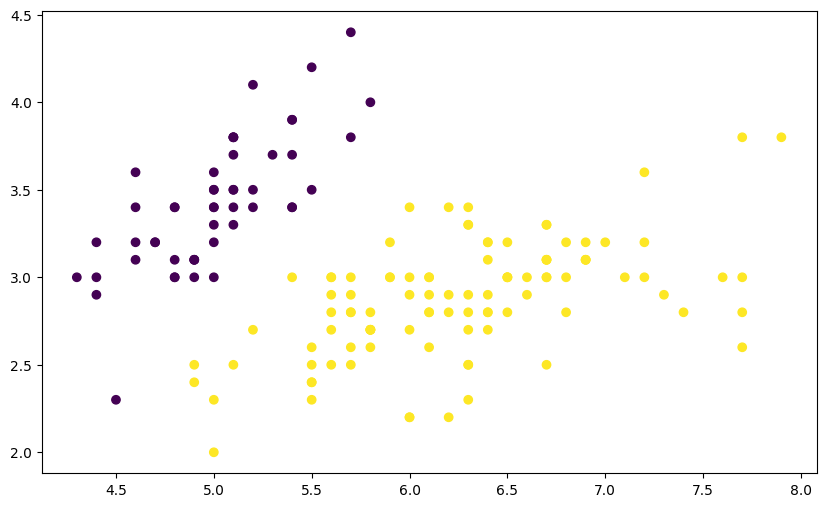

In [2]:
# 绘制数据集
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 6))
plt.scatter(df["X0"], df["X1"], c=df["Y"])

In [3]:
import numpy as np
x = df[["X0", "X1"]].values
y = df["Y"].values

# 使用 scikit-learn 构建逻辑回归分类器
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    tol=0.001, max_iter=10000, solver="liblinear"
)  # 设置数据解算精度和迭代次数
model.fit(x, y)
model.coef_, model.intercept_

(array([[ 2.49579289, -4.01011301]]), array([-0.81713932]))

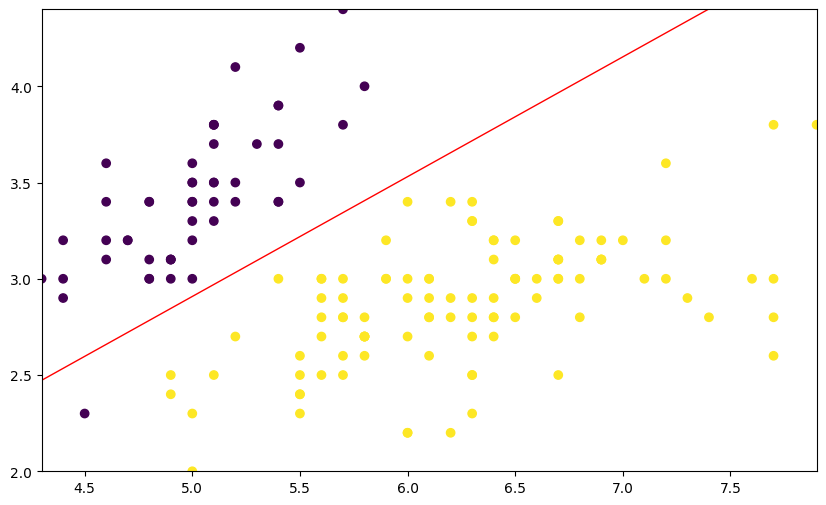

In [4]:
# 绘图
plt.figure(figsize=(10, 6))
plt.scatter(df["X0"], df["X1"], c=df["Y"])

x1_min, x1_max = df["X0"].min(), df["X0"].max()
x2_min, x2_max = df["X1"].min(), df["X1"].max()

xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]

probs = (np.dot(grid, model.coef_.T) + model.intercept_).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, levels=[0], linewidths=1, colors="red")

In [5]:
# 模型在训练集上的分类准确率
model.score(x, y)

0.9933333333333333